# Perplexity: How Surprised Is Your Model?

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mekjr1/evaluating_llms_in_practice/blob/master/part-3-perplexity/perplexity.ipynb?hl=en#runtime_type=gpu)

This notebook demonstrates how to compute perplexity, a metric that measures how well a language model predicts a sample of text. Lower perplexity indicates the model is less surprised by the text, meaning it predicts the words more accurately.


Perplexity is defined as the exponential of the average negative log-likelihood of a sequence.
For a sequence of words \(w_1, w_2, \dots, w_N\), the perplexity of a model with probability distribution \(P\) is:

\[ 	ext{Perplexity} = 2^{ -
rac{1}{N} \sum_{i=1}^N \log_2 P(w_i | w_{i-1}, \dots, w_{i-n+1}) } \]

In other words, the lower the perplexity, the better the model predicts the sequence. In the next cell, we build a simple n-gram model to estimate the perplexity on a small corpus.


In [1]:

import math
from collections import defaultdict

def build_ngram_model(text, n=2):
    # Build an n-gram model from the provided text.
    model = defaultdict(lambda: defaultdict(int))
    words = text.split()
    for i in range(n, len(words)):
        context = tuple(words[i-n:i])
        word = words[i]
        model[context][word] += 1
    # convert counts to probabilities
    for context, counts in model.items():
        total = float(sum(counts.values()))
        for word in list(counts.keys()):
            counts[word] /= total
    return model


def perplexity(model, text, n=2):
    # Compute perplexity of the model on the provided text.
    words = text.split()
    log_prob = 0.0
    count = 0
    for i in range(n, len(words)):
        context = tuple(words[i-n:i])
        word = words[i]
        prob = model.get(context, {}).get(word, 1e-6)  # smoothing for unseen words
        log_prob += -math.log(prob, 2)
        count += 1
    return math.pow(2, log_prob / max(count, 1))

# Example corpus for training and evaluation
train_text = "hello world it is a nice day hello world it is another beautiful day"
test_text = "hello world it is a sunny day hello world it is a nice day"

# Build bigram model (n=2)
model = build_ngram_model(train_text, n=2)

# Compute perplexity on train and test
train_perplexity = perplexity(model, train_text, n=2)
test_perplexity = perplexity(model, test_text, n=2)

print("Bigram Model Perplexity:\nTrain:", train_perplexity, " Test:", test_perplexity)


Bigram Model Perplexity:
Train: 1.122462048309373  Test: 35.49536659755571


Matplotlib is building the font cache; this may take a moment.


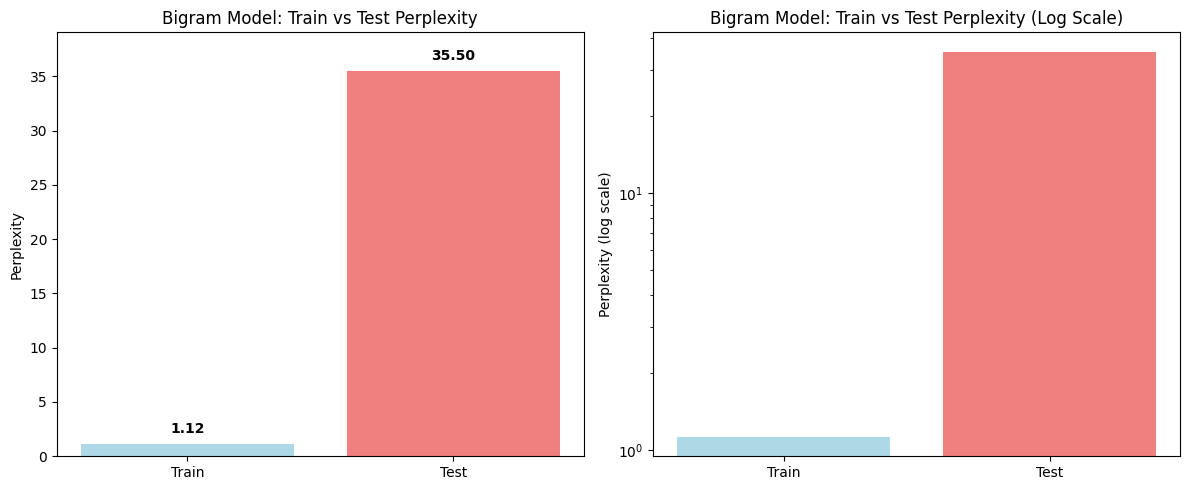


Perplexity Analysis:
Train Perplexity: 1.122
Test Perplexity: 35.495
Ratio (Test/Train): 31.62x

Interpretation:
- The model is 31.6x more surprised by the test text
- This indicates the model has learned specific patterns from the training text
- Higher test perplexity suggests the model may be overfitting to training patterns


In [3]:
# Install required packages for visualizations
import sys
try:
    import matplotlib.pyplot as plt
    import numpy as np
except ImportError:
    print("Installing required packages...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib", "numpy"])
    import matplotlib.pyplot as plt
    import numpy as np

# Create a visualization comparing train vs test perplexity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart comparing perplexities
models = ['Train', 'Test']
perplexities = [train_perplexity, test_perplexity]
colors = ['lightblue', 'lightcoral']

ax1.bar(models, perplexities, color=colors)
ax1.set_ylabel('Perplexity')
ax1.set_title('Bigram Model: Train vs Test Perplexity')
ax1.set_ylim(0, max(perplexities) * 1.1)

# Add value labels on bars
for i, v in enumerate(perplexities):
    ax1.text(i, v + max(perplexities) * 0.02, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Log scale comparison for better visualization
ax2.bar(models, perplexities, color=colors)
ax2.set_ylabel('Perplexity (log scale)')
ax2.set_title('Bigram Model: Train vs Test Perplexity (Log Scale)')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

print(f"\nPerplexity Analysis:")
print(f"Train Perplexity: {train_perplexity:.3f}")
print(f"Test Perplexity: {test_perplexity:.3f}")
print(f"Ratio (Test/Train): {test_perplexity/train_perplexity:.2f}x")
print(f"\nInterpretation:")
print(f"- The model is {test_perplexity/train_perplexity:.1f}x more surprised by the test text")
print(f"- This indicates the model has learned specific patterns from the training text")
print(f"- Higher test perplexity suggests the model may be overfitting to training patterns")

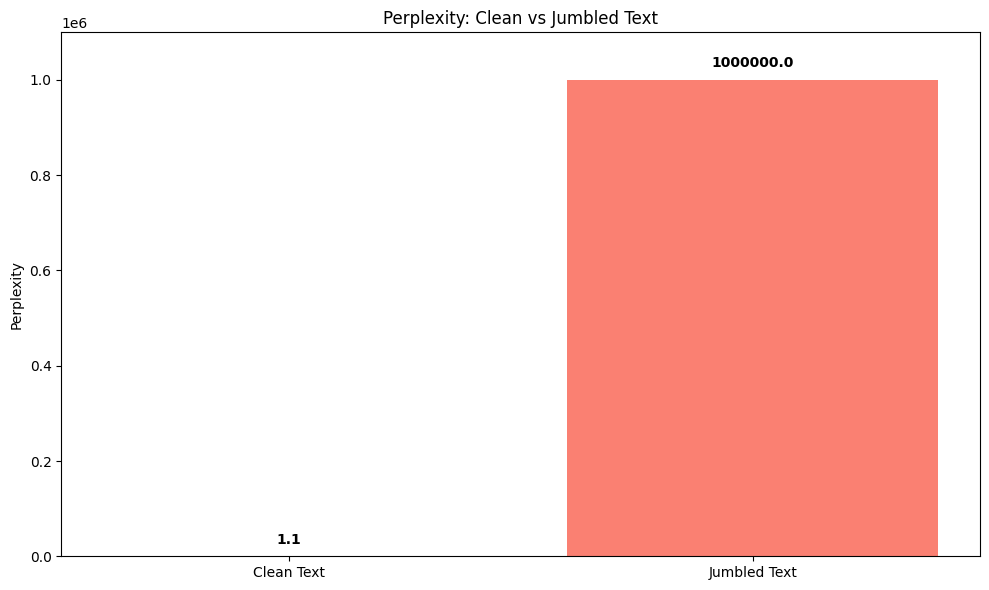

Text Comparison:
Clean text: 'the quick brown fox jumps over the lazy dog the cat sat on the mat'
Jumbled text: 'dog the lazy the mat on over brown the fox jumps sat the quick cat'

Perplexity Results:
Clean text perplexity: 1.05
Jumbled text perplexity: 1000000.00
Ratio (Jumbled/Clean): 948077.5x

Observation:
The model is 948077.5x more surprised by jumbled text,
demonstrating that perplexity captures linguistic structure and fluency.


In [4]:
# Demonstrate perplexity on clean vs jumbled text
import random

# Clean, well-formed text
clean_text = "the quick brown fox jumps over the lazy dog the cat sat on the mat"

# Create jumbled version by shuffling words
words = clean_text.split()
random.seed(42)  # For reproducible results
jumbled_words = words.copy()
random.shuffle(jumbled_words)
jumbled_text = " ".join(jumbled_words)

# Train a new model on a larger, more structured corpus
training_corpus = """
the quick brown fox jumps over the lazy dog
the cat sat on the mat and looked around
a bird flew over the house and landed softly
the sun shines bright in the clear blue sky
children play in the park with great joy
""".strip()

# Build model and compute perplexities
structured_model = build_ngram_model(training_corpus, n=2)
clean_perplexity = perplexity(structured_model, clean_text, n=2)
jumbled_perplexity = perplexity(structured_model, jumbled_text, n=2)

# Create visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

text_types = ['Clean Text', 'Jumbled Text']
perplexities = [clean_perplexity, jumbled_perplexity]
colors = ['lightgreen', 'salmon']

bars = ax.bar(text_types, perplexities, color=colors)
ax.set_ylabel('Perplexity')
ax.set_title('Perplexity: Clean vs Jumbled Text')
ax.set_ylim(0, max(perplexities) * 1.1)

# Add value labels
for i, v in enumerate(perplexities):
    ax.text(i, v + max(perplexities) * 0.02, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Text Comparison:")
print(f"Clean text: '{clean_text}'")
print(f"Jumbled text: '{jumbled_text}'")
print(f"\nPerplexity Results:")
print(f"Clean text perplexity: {clean_perplexity:.2f}")
print(f"Jumbled text perplexity: {jumbled_perplexity:.2f}")
print(f"Ratio (Jumbled/Clean): {jumbled_perplexity/clean_perplexity:.1f}x")
print(f"\nObservation:")
print(f"The model is {jumbled_perplexity/clean_perplexity:.1f}x more surprised by jumbled text,")
print(f"demonstrating that perplexity captures linguistic structure and fluency.")

1-gram model perplexity: 1.86
2-gram model perplexity: 1.00
3-gram model perplexity: 1.00
4-gram model perplexity: 1.00


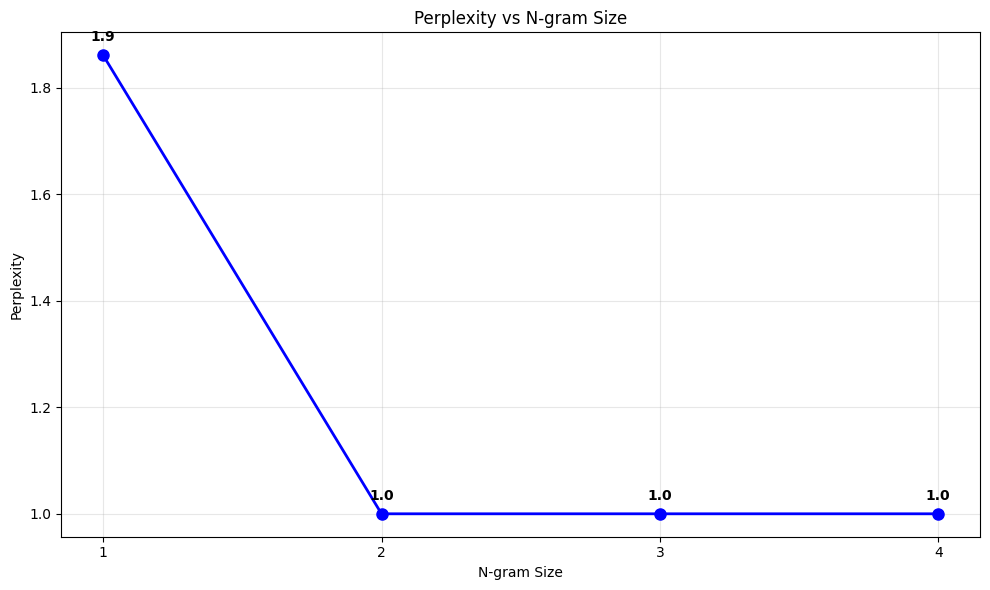


Test sentence: 'the quick brown fox jumps over the lazy dog'

Observations:
- Lower n-gram sizes (1-2) often perform better with limited training data
- Higher n-gram sizes need more training data to avoid sparsity issues
- The optimal n-gram size depends on the training corpus size and complexity


In [5]:
# Compare perplexity across different n-gram sizes
n_values = [1, 2, 3, 4]
test_sentence = "the quick brown fox jumps over the lazy dog"

# Use a richer training corpus
rich_corpus = """
the quick brown fox jumps over the lazy dog every morning
the cat sat on the mat and watched the world go by
a bird in the hand is worth two in the bush
the early bird catches the worm every single time
time flies when you are having fun with friends
the sun sets in the west and rises in the east
""".strip()

perplexity_results = []

for n in n_values:
    try:
        ngram_model = build_ngram_model(rich_corpus, n=n)
        ppl = perplexity(ngram_model, test_sentence, n=n)
        perplexity_results.append(ppl)
        print(f"{n}-gram model perplexity: {ppl:.2f}")
    except:
        # Handle cases where n-gram might not work (e.g., n too large)
        perplexity_results.append(float('inf'))
        print(f"{n}-gram model: Unable to compute (insufficient data)")

# Create visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Filter out infinite values for plotting
finite_results = [(n, ppl) for n, ppl in zip(n_values, perplexity_results) if ppl != float('inf')]
if finite_results:
    n_vals, ppl_vals = zip(*finite_results)
    
    ax.plot(n_vals, ppl_vals, 'bo-', linewidth=2, markersize=8)
    ax.set_xlabel('N-gram Size')
    ax.set_ylabel('Perplexity')
    ax.set_title('Perplexity vs N-gram Size')
    ax.set_xticks(n_vals)
    ax.grid(True, alpha=0.3)
    
    # Add value labels
    for n, ppl in zip(n_vals, ppl_vals):
        ax.annotate(f'{ppl:.1f}', (n, ppl), textcoords="offset points", 
                   xytext=(0,10), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTest sentence: '{test_sentence}'")
print(f"\nObservations:")
print(f"- Lower n-gram sizes (1-2) often perform better with limited training data")
print(f"- Higher n-gram sizes need more training data to avoid sparsity issues")
print(f"- The optimal n-gram size depends on the training corpus size and complexity")

In [2]:

# Optional: Compute perplexity using a pretrained language model from Hugging Face
# This cell will attempt to load a small model and compute perplexity on a simple sentence.
# If the environment does not have internet or the model cannot be loaded, it will fall back gracefully.
try:
    from transformers import AutoModelForCausalLM, AutoTokenizer
    import torch

    model_name = "distilgpt2"  # small model for demo
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)

    def calculate_perplexity(text):
        encodings = tokenizer(text, return_tensors='pt')
        max_length = model.config.n_positions
        stride = 512
        nlls = []
        for i in range(0, encodings.input_ids.size(1), stride):
            begin_loc = max(i + stride - max_length, 0)
            end_loc = i + stride
            trg_len = end_loc - i
            input_ids = encodings.input_ids[:, begin_loc:end_loc]
            target_ids = input_ids.clone()
            target_ids[:, :-trg_len] = -100

            with torch.no_grad():
                outputs = model(input_ids, labels=target_ids)
                neg_log_likelihood = outputs.loss * trg_len

            nlls.append(neg_log_likelihood)
        ppl = torch.exp(torch.stack(nlls).sum() / end_loc).item()
        return ppl

    sample_text = "Perplexity is a measure of how well a language model predicts text."
    print("Perplexity (distilgpt2):", calculate_perplexity(sample_text))
except Exception as e:
    print("Could not load pretrained model or compute perplexity due to:", e)


Could not load pretrained model or compute perplexity due to: No module named 'transformers'



### Conclusion

Perplexity gives us a quantitative measure of how well a language model predicts a sequence of text. In this notebook, we implemented a simple n-gram model and calculated perplexity on both training and test texts. We also attempted to use a pretrained Hugging Face model (DistilGPT-2) to compute perplexity on a sample sentence.

In practice, lower perplexity values indicate better predictive performance. However, perplexity alone doesn't tell the whole story — models can have low perplexity yet produce incoherent or irrelevant outputs. Therefore, perplexity should be used alongside other evaluation metrics and human judgment.
